# NB to analyze the pitch derived from the IMU data

In [1]:
from functions.pitch_analysis import *
from zurich_move_data_extraction import extract_sensors_data_from_axivity_file
from gm_function import compute_euler_angles, plot_angles_over_time

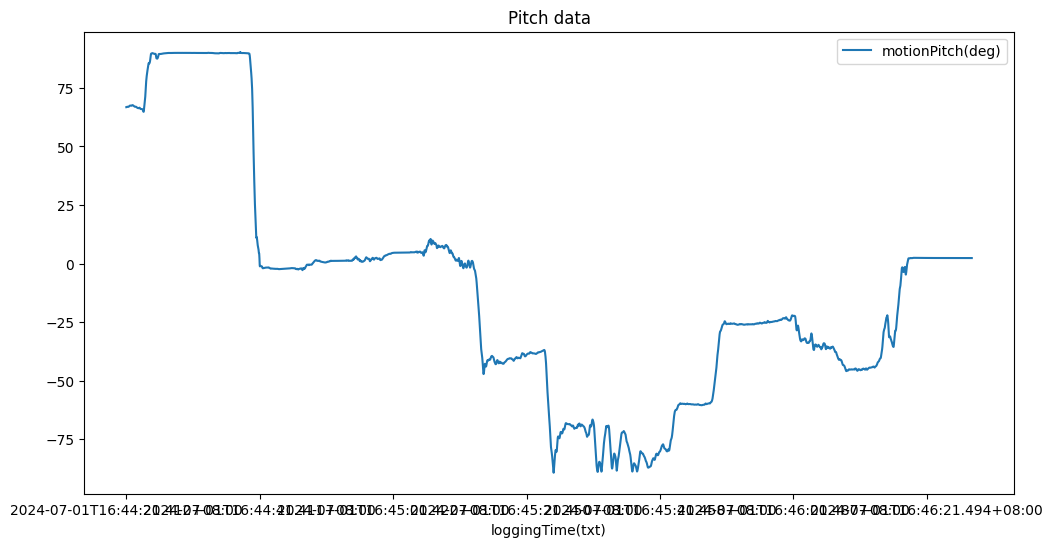

In [2]:
iphone_pitch = read_pitch_from_csv('../data/pitch_analysis/2024-07-01_16_44_21_my_iOS_device 2024-07-01 08_51_15.csv')
plot_pitch_data(iphone_pitch)

In [4]:
sensor_features = ['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z']
LW_data = extract_sensors_data_from_axivity_file('../data/pitch_analysis/6023695_0000000999.resampled.csv', sensor_features)
RW_data = extract_sensors_data_from_axivity_file('../data/pitch_analysis/6022607_0000000999.resampled.csv', sensor_features)
acc_LW = LW_data[['acc_x', 'acc_y', 'acc_z']]
acc_RW = RW_data[['acc_x', 'acc_y', 'acc_z']]
gyro_LW = LW_data[['gyro_x', 'gyro_y', 'gyro_z']]
gyro_RW = RW_data[['gyro_x', 'gyro_y', 'gyro_z']]

FileNotFoundError: [Errno 2] No such file or directory: '..data/pitch_analysis/6023695_0000000999.resampled.csv'

In [ ]:
# Get Euler angles usign Madgwick sensor fusiona algorithm 
# Using only accel. and gyro 
# MARG uses also magnetometer but after testing, it was less precise 
sampling_freq = 50 # Hz
# Left wrist
_, pitch_mad_LW, _ = compute_euler_angles(acc_LW, gyro_LW, sampling_freq)
# Right wrist 
_, pitch_mad_RW, _ = compute_euler_angles(acc_RW, gyro_RW, sampling_freq)

In [ ]:
plot_angles_over_time(pitch_mad_LW)
plot_angles_over_time(pitch_mad_RW)